<a href="https://colab.research.google.com/github/hasmitha005/OIBSIP/blob/main/Project_1_Proposal_level1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Upload and read the dataset
uploaded = files.upload()

# Step 3: Load into DataFrame
df = pd.read_csv('retail_sales_dataset (1).csv')

# Step 4: View the first 5 rows
df.head()


Saving retail_sales_dataset (1).csv to retail_sales_dataset (1) (1).csv


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
# Check basic info
df.info()

# Check missing values
df.isnull().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill missing numeric values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify cleaning
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


/tmp/ipython-input-2690144047.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
# Summary statistics
df.describe()

# Total Sales
total_sales = df['Total Amount'].sum()
print("💰 Total Sales:", total_sales)

# Average price per unit
avg_price = df['Price per Unit'].mean()
print("🏷️ Average Price per Unit:", avg_price)

# Total number of transactions
total_transactions = df['Transaction ID'].nunique()
print("🧾 Total Transactions:", total_transactions)

# Top 5 Product Categories
top_categories = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head()
top_categories


💰 Total Sales: 456000
🏷️ Average Price per Unit: 179.89
🧾 Total Transactions: 1000


,Total Amount
Product Category,
Electronics,156905
Clothing,155580
Beauty,143515


In [ ]:
df.columns


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

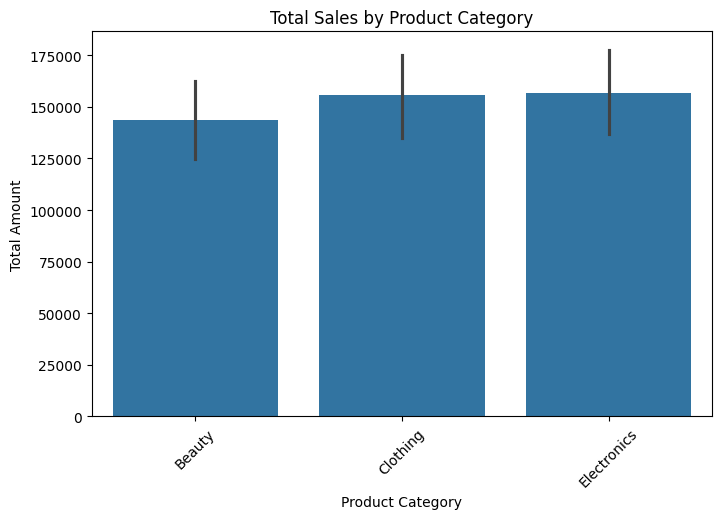

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2214133410.py:17: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


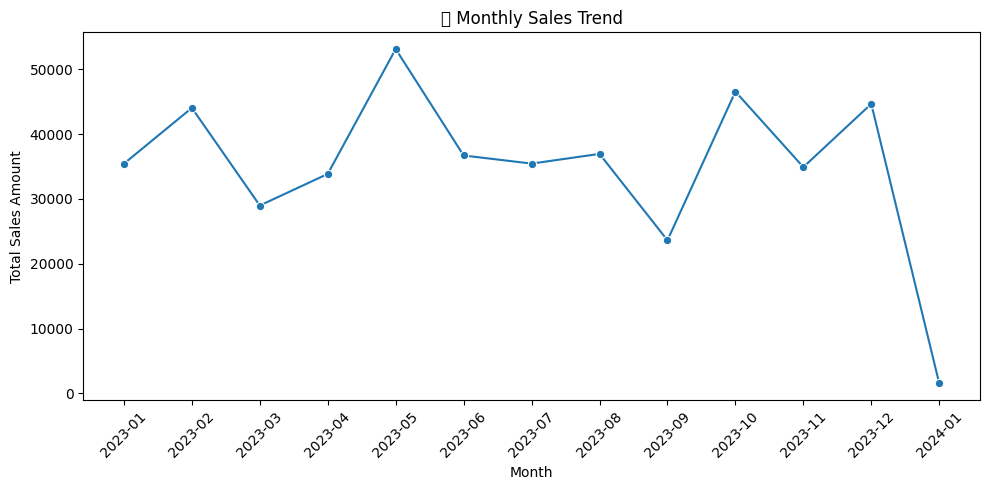

In [ ]:
# Convert 'Date' column to datetime format (just in case)
df['Date'] = pd.to_datetime(df['Date'])

# Create 'Month' column in datetime format
df['Month'] = df['Date'].dt.to_period('M').astype(str)  # Convert Period to string

# Group by Month and calculate total sales
monthly_sales = df.groupby('Month', as_index=False)['Total Amount'].sum()

# Plot Monthly Sales Trend
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o')
plt.title('📅 Monthly Sales Trend')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()


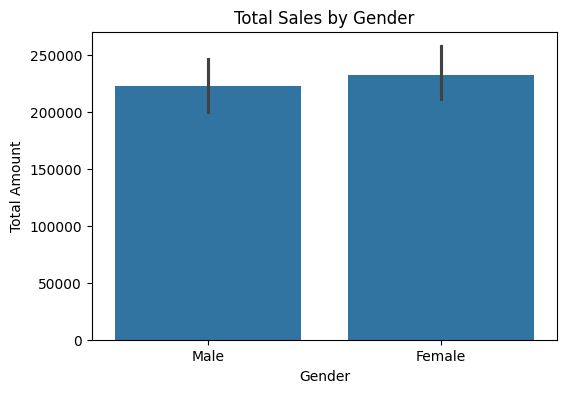

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Total Amount', data=df, estimator=sum)
plt.title('Total Sales by Gender')
plt.show()


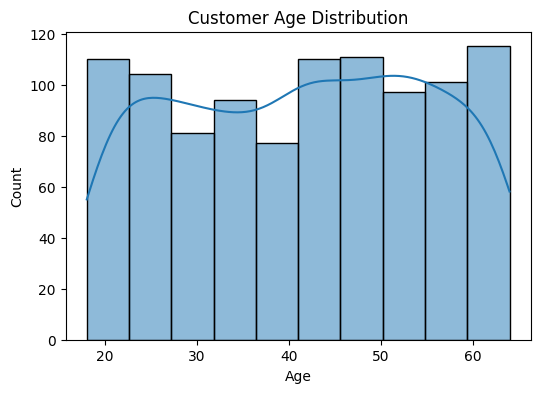

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


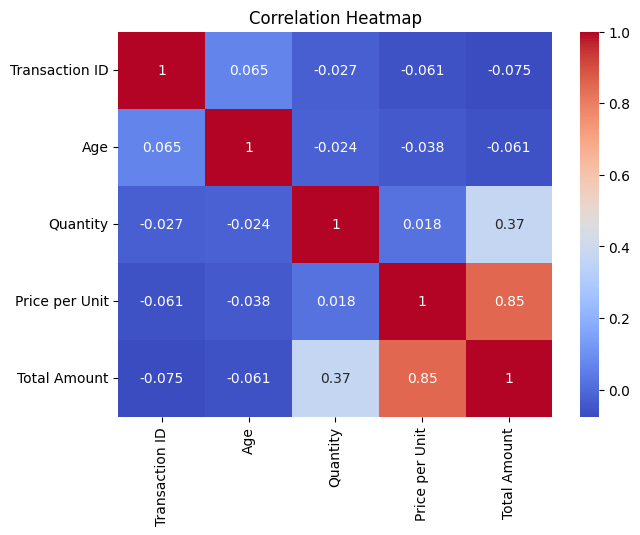

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
print("🔎 Key Insights:")
print("1️⃣ Total Sales:", total_sales)
print("2️⃣ Best-Selling Category:", top_categories.index[0])
print("3️⃣ Average Price per Unit:", round(avg_price, 2))
print("4️⃣ Total Transactions:", total_transactions)


🔎 Key Insights:
1️⃣ Total Sales: 456000
2️⃣ Best-Selling Category: Electronics
3️⃣ Average Price per Unit: 179.89
4️⃣ Total Transactions: 1000


Dataset-2


In [ ]:
# Cell 1: imports and load
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: improve plot appearance
plt.rcParams['figure.figsize'] = (10,5)
sns.set(style="whitegrid")

# Upload (use this if you want to upload manually)
# uploaded = files.upload()   # uncomment if you want to upload during runtime

# Try reading the file you said was uploaded. Adjust filename if different.
try:
    df = pd.read_csv('menu.csv')            # fallback to the uploaded menu.csv
except FileNotFoundError:
    # If you used files.upload() earlier, pick the first uploaded filename dynamically:
    try:
        uploaded = files.upload()
        first_name = list(uploaded.keys())[0]
        df = pd.read_csv(first_name)
    except Exception as e:
        # Last fallback: attempt the original name you used previously
        df = pd.read_csv('/mnt/data/menu.csv')

# Show top rows and columns
print("Dataset loaded. Shape:", df.shape)
display(df.head())


Saving menu.csv to menu.csv
Dataset loaded. Shape: (260, 24)


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [ ]:
# Cell 2: inspect columns and datatypes
print("Columns list:")
print(df.columns.tolist())
print("\nData types and non-null counts:")
display(df.info())
print("\nFirst few rows again:")
display(df.head())


Columns list:
['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 

None


First few rows again:


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [ ]:
# Cell 3: basic cleaning

# 1) Strip whitespace from column names and replace problematic characters
df.columns = [c.strip().replace('\n',' ').replace('/', ' ').replace('(', '').replace(')', '') for c in df.columns]

# 2) Make column names easier to reference (optional): lowercase & replace spaces with underscores
orig_columns = df.columns.tolist()
df.columns = [c.lower().strip().replace(' ', '_') for c in df.columns]

print("Normalized columns:")
print(df.columns.tolist())

# 3) Check for duplicates and remove
dupes = df.duplicated().sum()
print(f"\nDuplicate rows: {dupes}")
if dupes:
    df = df.drop_duplicates()
    print("Duplicates dropped. New shape:", df.shape)

# 4) Convert numeric columns that may have strings (like "100 g" or "120 mg") into numbers where appropriate.
# We'll detect columns with numeric-looking values and coerce to numeric, leaving others intact.

def try_coerce_numeric(col):
    # remove non-digit characters except dot and minus and convert
    series = df[col].astype(str).str.replace(r'[^0-9.\-]', '', regex=True)
    coerced = pd.to_numeric(series, errors='coerce')
    return coerced

# Apply coercion to columns where more than half values can be numeric
for col in df.columns:
    sample = df[col].dropna().astype(str).head(50).tolist()
    # if majority of sample values contain digits, attempt coercion
    if sum(1 for s in sample if any(ch.isdigit() for ch in s)) >= max(1, len(sample)//2):
        coerced = try_coerce_numeric(col)
        # If coercion gives a numeric column (not all NaN), keep it
        if coerced.notna().sum() > 0:
            df[col + "_num"] = coerced

print("\nColumns after making *_num numeric attempts:")
print([c for c in df.columns if c.endswith('_num')])


Normalized columns:
['category', 'item', 'serving_size', 'calories', 'calories_from_fat', 'total_fat', 'total_fat_%_daily_value', 'saturated_fat', 'saturated_fat_%_daily_value', 'trans_fat', 'cholesterol', 'cholesterol_%_daily_value', 'sodium', 'sodium_%_daily_value', 'carbohydrates', 'carbohydrates_%_daily_value', 'dietary_fiber', 'dietary_fiber_%_daily_value', 'sugars', 'protein', 'vitamin_a_%_daily_value', 'vitamin_c_%_daily_value', 'calcium_%_daily_value', 'iron_%_daily_value']

Duplicate rows: 0

Columns after making *_num numeric attempts:
['serving_size_num', 'calories_num', 'calories_from_fat_num', 'total_fat_num', 'total_fat_%_daily_value_num', 'saturated_fat_num', 'saturated_fat_%_daily_value_num', 'trans_fat_num', 'cholesterol_num', 'cholesterol_%_daily_value_num', 'sodium_num', 'sodium_%_daily_value_num', 'carbohydrates_num', 'carbohydrates_%_daily_value_num', 'dietary_fiber_num', 'dietary_fiber_%_daily_value_num', 'sugars_num', 'protein_num', 'vitamin_a_%_daily_value_num',

In [ ]:
# Cell 4: basic statistics using numeric columns we created (or existing numeric types)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns detected:", numeric_cols)

# If the dataset includes familiar columns like 'calories', there might be a calories_num column
# Show descriptive stats
display(df[numeric_cols].describe().transpose())

# Example: total number of unique menu items
if 'item' in df.columns:
    print("Unique menu items:", df['item'].nunique())
else:
    # attempt to find a column that looks like item name
    possible_name_cols = [c for c in df.columns if 'item' in c or 'name' in c]
    print("Possible name columns:", possible_name_cols)


Numeric columns detected: ['calories', 'calories_from_fat', 'total_fat', 'total_fat_%_daily_value', 'saturated_fat', 'saturated_fat_%_daily_value', 'trans_fat', 'cholesterol', 'cholesterol_%_daily_value', 'sodium', 'sodium_%_daily_value', 'carbohydrates', 'carbohydrates_%_daily_value', 'dietary_fiber', 'dietary_fiber_%_daily_value', 'sugars', 'protein', 'vitamin_a_%_daily_value', 'vitamin_c_%_daily_value', 'calcium_%_daily_value', 'iron_%_daily_value', 'serving_size_num', 'calories_num', 'calories_from_fat_num', 'total_fat_num', 'total_fat_%_daily_value_num', 'saturated_fat_num', 'saturated_fat_%_daily_value_num', 'trans_fat_num', 'cholesterol_num', 'cholesterol_%_daily_value_num', 'sodium_num', 'sodium_%_daily_value_num', 'carbohydrates_num', 'carbohydrates_%_daily_value_num', 'dietary_fiber_num', 'dietary_fiber_%_daily_value_num', 'sugars_num', 'protein_num', 'vitamin_a_%_daily_value_num', 'vitamin_c_%_daily_value_num', 'calcium_%_daily_value_num', 'iron_%_daily_value_num']


,count,mean,std,min,25%,50%,75%,max
calories,260.0,368.269231,240.269886,0.000,210.00000,340.0,500.00,1880.0
calories_from_fat,260.0,127.096154,127.875914,0.000,20.00000,100.0,200.00,1060.0
total_fat,260.0,14.165385,14.205998,0.000,2.37500,11.0,22.25,118.0
total_fat_%_daily_value,260.0,21.815385,21.885199,0.000,3.75000,17.0,35.00,182.0
saturated_fat,260.0,6.007692,5.321873,0.000,1.00000,5.0,10.00,20.0
saturated_fat_%_daily_value,260.0,29.965385,26.639209,0.000,4.75000,24.0,48.00,102.0
trans_fat,260.0,0.203846,0.429133,0.000,0.00000,0.0,0.00,2.5
cholesterol,260.0,54.942308,87.269257,0.000,5.00000,35.0,65.00,575.0
cholesterol_%_daily_value,260.0,18.392308,29.091653,0.000,2.00000,11.0,21.25,192.0
sodium,260.0,495.750000,577.026323,0.000,107.50000,190.0,865.00,3600.0


Unique menu items: 260


Plotting calories distribution using: calories_num


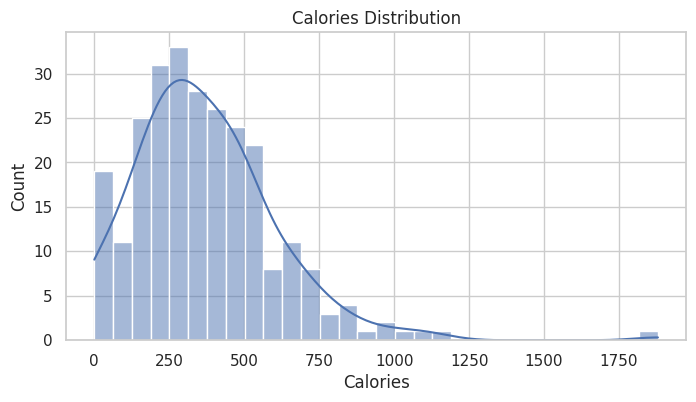

In [ ]:
# Cell 5a: calories distribution (safely)
cal_col = None
for c in df.columns:
    if 'calor' in c and c.endswith('_num'):
        cal_col = c
        break

if cal_col is None:
    print("No numeric 'calories' column detected automatically. Columns available:", [c for c in df.columns if 'calor' in c or 'calorie' in c])
else:
    print("Plotting calories distribution using:", cal_col)
    plt.figure(figsize=(8,4))
    sns.histplot(df[cal_col].dropna(), bins=30, kde=True)
    plt.title('Calories Distribution')
    plt.xlabel('Calories')
    plt.show()


In [ ]:
# Cell 5b: top calorie items
name_col = None
for c in df.columns:
    if c in ['item', 'name', 'product'] or 'item' in c or 'name' in c:
        name_col = c
        break

if cal_col and name_col:
    top10 = df[[name_col, cal_col]].dropna().sort_values(by=cal_col, ascending=False).head(10)
    display(top10)
else:
    print("Either name or calories column missing. name_col:", name_col, "cal_col:", cal_col)


,item,calories_num
82,Chicken McNuggets (40 piece),1880
32,Big Breakfast with Hotcakes (Large Biscuit),1150
31,Big Breakfast with Hotcakes (Regular Biscuit),1090
34,Big Breakfast with Hotcakes and Egg Whites (La...,1050
33,Big Breakfast with Hotcakes and Egg Whites (Re...,990
81,Chicken McNuggets (20 piece),940
253,McFlurry with M&M’s Candies (Medium),930
249,Chocolate Shake (Large),850
246,Strawberry Shake (Large),850
251,Shamrock Shake (Large),820


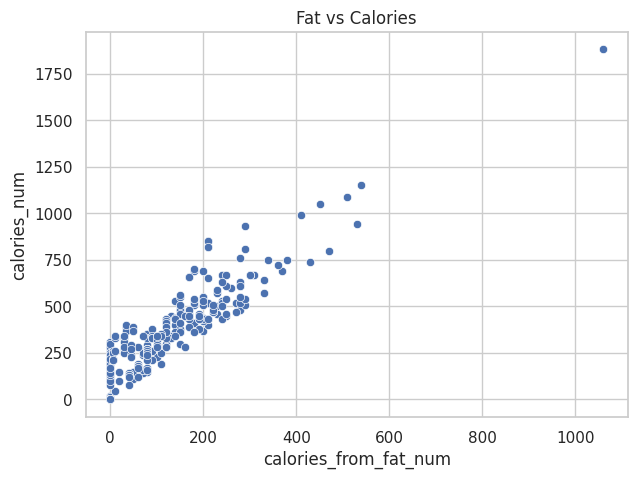

In [ ]:
# Cell 5c: scatter fat vs calories
fat_col = None
for c in df.columns:
    if 'fat' in c and c.endswith('_num'):
        fat_col = c
        break

if cal_col and fat_col:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x=fat_col, y=cal_col)
    plt.title('Fat vs Calories')
    plt.xlabel(fat_col)
    plt.ylabel(cal_col)
    plt.show()
else:
    print("Missing fat or calories numeric columns. fat_col:", fat_col, "cal_col:", cal_col)


In [ ]:
# Cell 5d: category-wise averages
cat_col = None
for c in df.columns:
    if 'category' in c:
        cat_col = c
        break

if cat_col:
    # choose a handful of numeric columns to summarize (top 6)
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if num_cols:
        summary = df.groupby(cat_col)[num_cols].mean().sort_values(by=num_cols[0], ascending=False)
        display(summary.head(10))
    else:
        print("No numeric columns to aggregate.")
else:
    print("No category column found.")


,calories,calories_from_fat,total_fat,total_fat_%_daily_value,saturated_fat,saturated_fat_%_daily_value,trans_fat,cholesterol,cholesterol_%_daily_value,sodium,...,carbohydrates_num,carbohydrates_%_daily_value_num,dietary_fiber_num,dietary_fiber_%_daily_value_num,sugars_num,protein_num,vitamin_a_%_daily_value_num,vitamin_c_%_daily_value_num,calcium_%_daily_value_num,iron_%_daily_value_num
category,,,,,,,,,,,,,,,,,,,,,
Chicken & Fish,552.962963,242.222222,26.962963,41.333333,6.166667,31.111111,0.129630,75.370370,25.222222,1257.777778,...,49.074074,16.333333,2.925926,11.814815,7.333333,29.111111,20.444444,12.629630,15.444444,16.370370
Smoothies & Shakes,531.428571,127.678571,14.125000,21.714286,8.375000,41.785714,0.535714,45.000000,14.714286,183.571429,...,90.428571,30.142857,1.464286,5.750000,77.892857,10.857143,18.750000,6.964286,35.571429,3.964286
Breakfast,526.666667,248.928571,27.690476,42.666667,10.654762,53.428571,0.107143,152.857143,50.952381,1211.071429,...,49.761905,16.571429,3.261905,12.833333,8.261905,19.857143,6.928571,8.904762,16.166667,17.142857
Beef & Pork,494.000000,224.666667,24.866667,38.600000,10.466667,52.000000,1.100000,87.333333,28.933333,1020.666667,...,40.133333,13.466667,2.533333,9.866667,8.800000,27.333333,6.933333,7.333333,23.000000,23.333333
Coffee & Tea,283.894737,71.105263,8.021053,12.357895,4.921053,24.368421,0.142105,27.263158,9.378947,136.894737,...,44.526316,14.863158,0.778947,3.178947,39.610526,8.863158,10.736842,0.000000,28.294737,2.147368
Salads,270.000000,108.333333,11.750000,18.333333,3.750000,18.500000,0.000000,51.666667,17.333333,588.333333,...,21.666667,7.166667,4.500000,18.500000,6.833333,19.833333,146.666667,28.333333,15.000000,10.333333
Snacks & Sides,245.769231,94.615385,10.538462,16.230769,2.692308,13.384615,0.000000,18.461538,6.230769,395.769231,...,29.153846,9.615385,1.538462,7.076923,4.076923,8.384615,4.846154,28.153846,6.000000,6.615385
Desserts,222.142857,64.285714,7.357143,11.142857,4.285714,21.285714,0.000000,15.000000,4.857143,117.142857,...,34.857143,11.571429,1.000000,3.428571,26.142857,4.000000,5.142857,4.142857,11.428571,4.000000
Beverages,113.703704,0.740741,0.092593,0.148148,0.055556,0.296296,0.000000,0.555556,0.185185,41.481481,...,28.814815,9.592593,0.037037,0.074074,27.851852,1.333333,0.740741,23.481481,2.962963,0.296296


In [ ]:
# Cell 6: Check for non-numeric objects inside numeric columns (to avoid TypeError)
for col in df.select_dtypes(include=['object']).columns:
    sample = df[col].dropna().astype(str).head(20).tolist()
    # show a few values if they look numeric-like but contain letters
    if any(any(ch.isdigit() for ch in s) for s in sample):
        print(f"Sample values from '{col}':", sample[:5])


Sample values from 'serving_size': ['4.8 oz (136 g)', '4.8 oz (135 g)', '3.9 oz (111 g)', '5.7 oz (161 g)', '5.7 oz (161 g)']
